# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
mouse_data_df = study_results.merge(mouse_metadata, how='inner', on='Mouse ID')

# Display the data table for preview
mouse_data_df.sample(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1641,q483,5,46.776816,1,Ceftamin,Male,6,26
1745,u364,0,45.000000,0,Capomulin,Male,18,17
1438,s121,15,50.824560,2,Infubinol,Male,23,26
177,a818,30,60.072372,0,Naftisol,Female,12,28
803,c402,15,52.230719,1,Stelasyn,Female,1,27


In [2]:
# Checking the number of mice.
num_mice = len(mouse_data_df["Mouse ID"].unique())
instances_of_ids = mouse_data_df["Mouse ID"].value_counts()  


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f
duplicate_count = mouse_data_df.duplicated(subset=["Mouse ID"]) # returns a dataframe with booleans

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_duplicated_df = mouse_data_df.loc[mouse_data_df.duplicated(subset=["Mouse ID"]), :]
mouse_duplicated_df.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22
12,g107,5,48.791665,0,Ketapril,Female,2,29


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_cleaned_df = mouse_data_df.drop_duplicates(subset=["Mouse ID"])

In [7]:
# Checking the number of mice in the clean DataFrame.
instances_of_ids = mouse_cleaned_df["Mouse ID"].value_counts()
instances_of_ids
mouse_cleaned_df.sample(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1135,r850,0,45.0,0,Placebo,Male,5,30
525,x402,0,45.0,0,Stelasyn,Male,21,28
213,c326,0,45.0,0,Infubinol,Female,18,25
1139,i669,0,45.0,0,Placebo,Female,18,27
1512,s141,0,45.0,0,Propriva,Male,8,25
1558,x209,0,45.0,0,Propriva,Female,7,29
1564,z435,0,45.0,0,Propriva,Female,12,26
11,g107,0,45.0,0,Ketapril,Female,2,29
1795,r944,0,45.0,0,Capomulin,Male,12,25
70,b559,0,45.0,0,Naftisol,Male,20,26


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.



In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_drugs = mouse_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

## Bar and Pie Charts

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

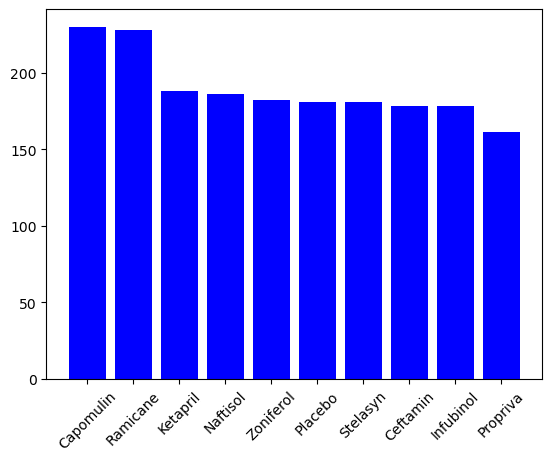

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# get the y-axis
drug_count = mouse_data_df.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending=False)

# get the x-axis
x_axis = np.arange(len(mouse_data_df["Drug Regimen"].unique()))

# make bar plot
plt.bar(drug_count.index.values, drug_count.values, color="blue", align="center")
plt.xticks(rotation="45")

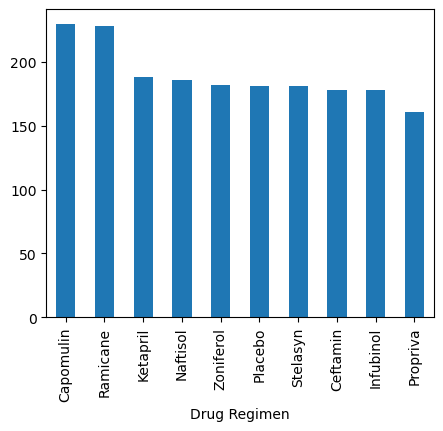

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_count = mouse_data_df.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending=False)
my_df_plot = drug_count.plot(kind="bar", figsize=(5,4))    # must declare kind='graph-type' 
plt.show()

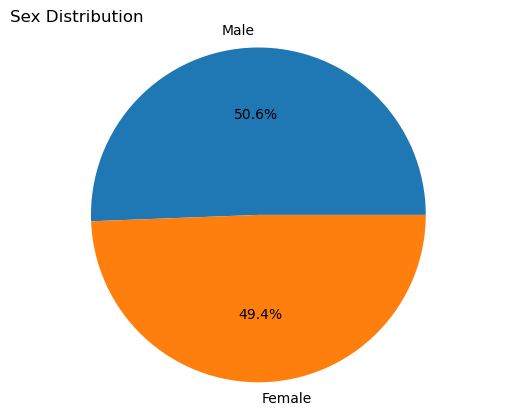

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution = mouse_data_df["Sex"].value_counts()

numbers = sex_distribution.values
sex = ["Male", "Female"]


plt.pie(numbers, labels=sex, autopct="%1.1f%%")
plt.axis("equal")
plt.title("Sex Distribution", loc='left')
plt.show()

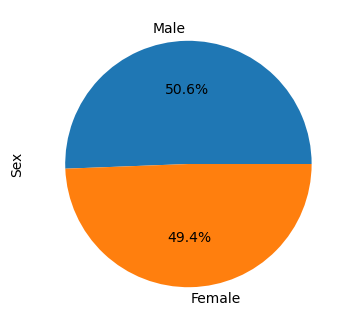

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution = mouse_data_df["Sex"].value_counts()
my_df_plot = gender_distribution.plot(kind="pie", figsize=(5,4), autopct='%1.1f%%')   
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_time_points = mouse_data_df.groupby("Mouse ID").last()
last_time_points

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a203,45,67.973419,2,Infubinol,Female,20,23
a251,45,65.525743,1,Infubinol,Female,21,25
a262,45,70.717621,4,Placebo,Female,17,29
a275,45,62.999356,3,Ceftamin,Female,20,28
a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...
z435,10,48.710661,0,Propriva,Female,12,26
z578,45,30.638696,0,Ramicane,Male,11,16
z581,45,62.754451,3,Infubinol,Female,24,25


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

